In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def psd_cleanup(arr,thresh):
    N = arr.shape[0]

    freqs = np.fft.fft(arr)

    psds = ((freqs * np.conj(freqs)) / N).real

    print("PSD shape",psds.shape)

    plt.plot(psds)
    plt.show()

    thresh_idx = psds > thresh

    cleaned_psds = psds * thresh_idx

    plt.plot(cleaned_psds)
    plt.show()
    

    cleaned_freqs = freqs * thresh_idx

    cleaned_arr = np.fft.ifft(cleaned_freqs).real

    plt.plot(arr,label='original')
    plt.plot(cleaned_arr,label='cleaned')

    plt.legend()
    plt.show()

    print("RMSE ",np.sqrt(np.square(cleaned_arr - arr).sum()))

In [3]:
size = 500
thresh = 3

In [4]:
arr = np.random.randn(size)

In [5]:
arr.shape

(500,)

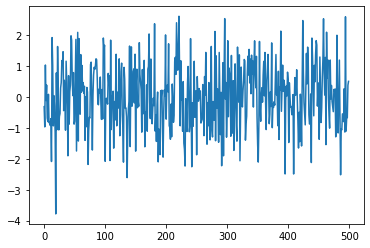

In [6]:
plt.plot(arr)

PSD shape (500,)


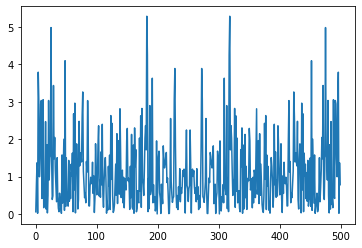

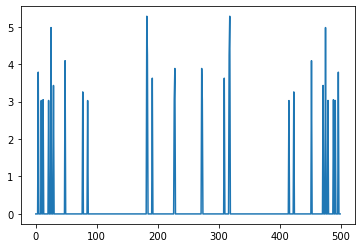

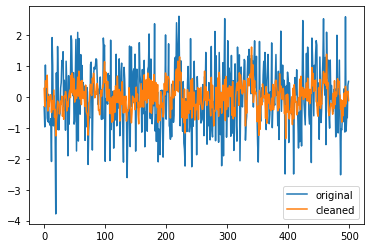

RMSE  21.193183778227127


In [7]:
psd_cleanup(arr,thresh)

In [8]:
noisy_arr = arr.copy()

In [9]:
random_idx = np.random.randint(1,size,5)

noisy_arr[random_idx] = noisy_arr[random_idx] * 10

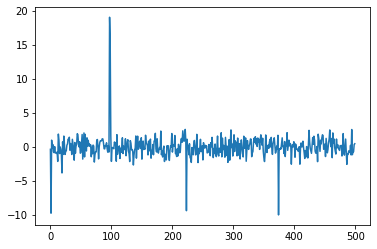

In [10]:
plt.plot(noisy_arr)

PSD shape (500,)


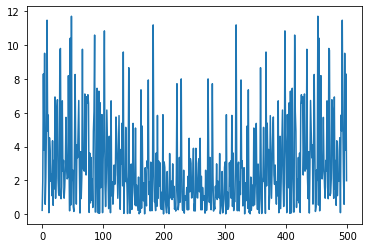

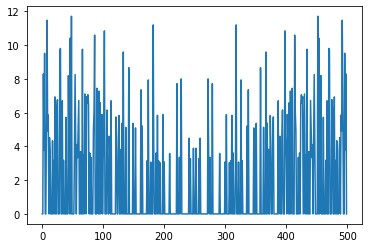

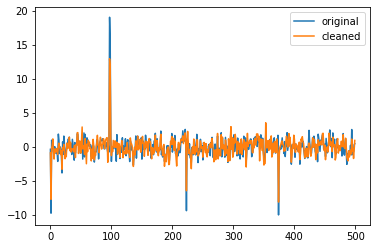

RMSE  19.778990075710073


In [11]:
psd_cleanup(noisy_arr,thresh)